<a href="https://colab.research.google.com/github/arthurweslen/PowerQuery_DAX/blob/main/DAX/Editando%20Gr%C3%A1fico%20com_%20DAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Destancando o Maior e o Menor valor no gráfico de Coluna**

Nesse exemplo, iremos destacar o maior valor e o menor valor com uma cor diferente, para facilitar a leitura do usuário

1) Crie uma medida com a primeira variável para o maior valor, utilizando MAXX
2) Crie a segunda variável com valor mínimo, utilizando MINX
3) Crie uma condicional, comparando a sua medida total com as variáveis de MAXX e MIX.
4) Crie um gráfico de coluna, inserindo a coluna de data no eixo X, no exemplo abaixo será a d_Calendario[Mes/Ano], e o total no eixo Y
5) Nas colunas, coloque cor condicional, e insere a medida nova

Abaixo temos exemplo, o segredo é combinar o MAXX com o ALL.
Em qualquer site, procure a cor hexadecimal desejada

In [ ]:
Total Max_Min =
VAR TOTAL_MAXIMO =
    CALCULATE(
        MAXX(
            ALLSELECTED(d_Calendario[Mes/Ano]), //# Remove o filtro da matriz para avaliar TODOS os meses
            [Total]
        ),
        ALLSELECTED(d_Calendario)  //# Garante que o máximo não seja filtrado pelo mês atual (maior valor se retepe)
     )

VAR VALOR_MINIMO =
    CALCULATE(
        MINX(
            ALLSELECTED(d_Calendario[Mes/Ano]),  //# Remove filtro para olhar TODOS os meses
            [Total]
        ),
        ALLSELECTED(d_Calendario) //# Garante que o m´nimo não seja filtrado pelo mês atual (maior valor se retepe)
    )


VAR RESULTADO =
    IF([Total] = TOTAL_MAXIMO, "#008B8B",
    IF([Total] = VALOR_MINIMO, "#FF6347", "#A9A9A9") )

RETURN RESULTADO


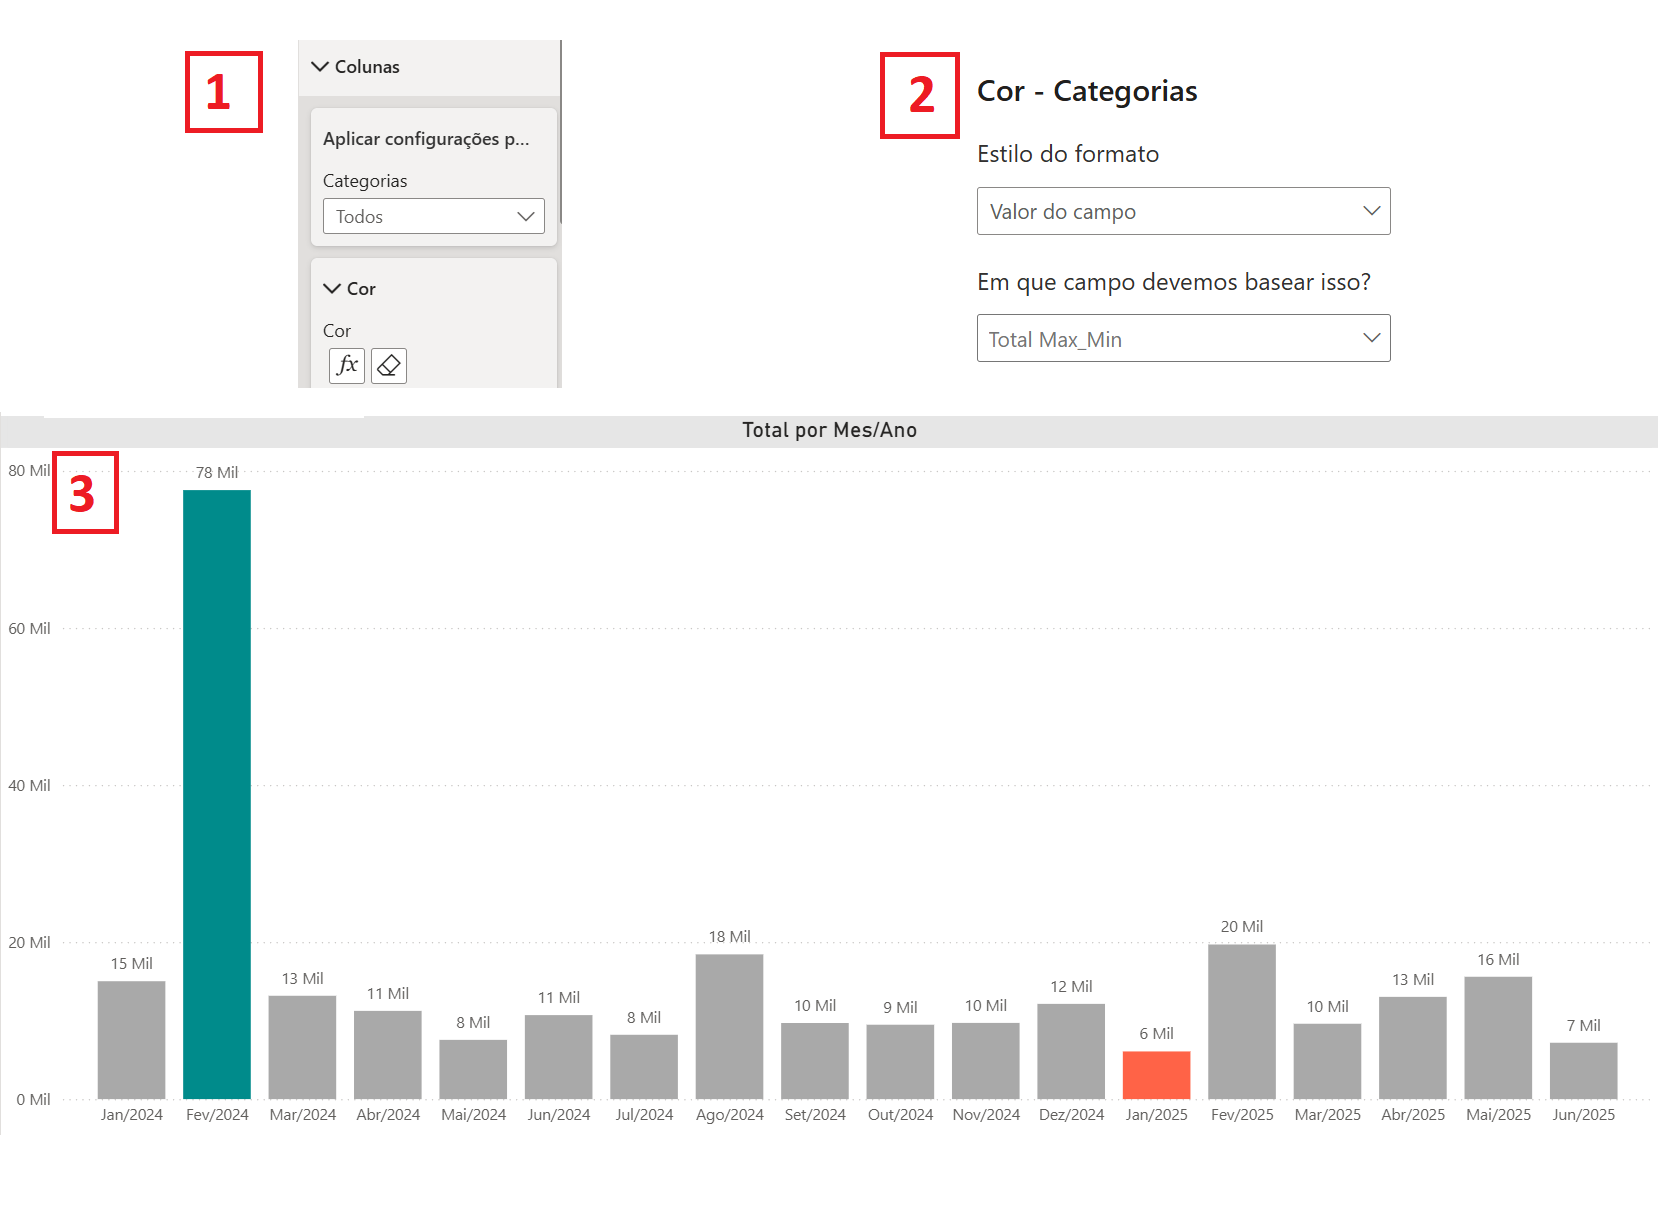

## **Destancando o Primeiro e o Último valor da coluna**

Semelhante a medida de cima, mas agora precisaremos utilizar o coluna **ID Data**

Link para criar ID Rank: https://github.com/arthurweslen/PowerQuery_DAX/blob/main/DAX/d_Calendario.ipynb

In [ ]:
__Formatar Primeiro e Ultima Coluna =
// Primeiro Valor ou Primeira Coluna
VAR ID_Primeiro_Valor =
CALCULATE(
    MIN(d_Calendario[ID Data]),
    ALLSELECTED(d_Calendario))

VAR Primeiro_Valor_Coluna =
CALCULATE(
    [Admissões],
    d_Calendario[ID Data] = ID_Primeiro_Valor)
//=============================================

// Ultimo Valor ou Ultima Coluna
VAR ID_Ultimo_Valor =
CALCULATE(
    MAX(d_Calendario[ID Data]),
    FILTER(
        ALLSELECTED(d_Calendario),
        NOT(ISBLANK([Admissões])))
)

VAR Ultimo_Valor_Coluna =
CALCULATE(
    [Admissões],
    d_Calendario[ID Data] = ID_Ultimo_Valor)
//=============================================

VAR RESULTADO=
IF([Admissões] = Primeiro_Valor_Coluna,"008B8B",
IF([Admissões] = Ultimo_Valor_Coluna,"#FF6347", "#A9A9A9"))

RETURN  RESULTADO


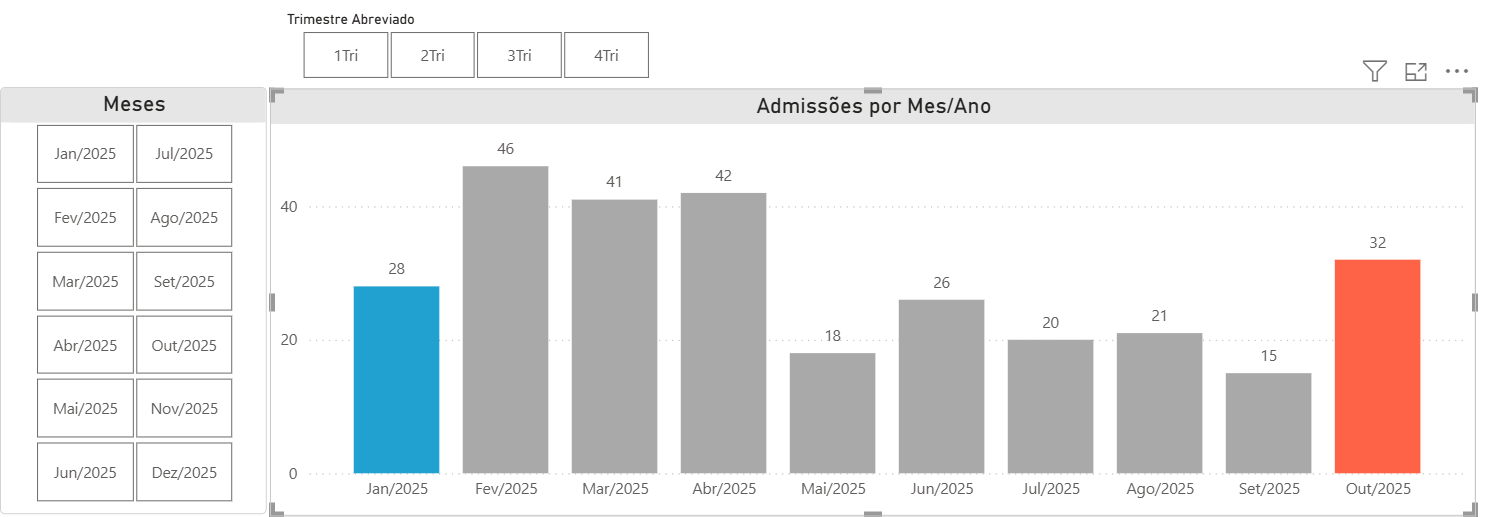

## **Destancando colunas acima da média**

No exemplo abaixo, estamos destacando os valores das vendas que foram acima da média

Semelhante ao exemplo de cima, desta vez, utilizaremos o **AVERAGEX**, e o restante fica igual, combinando com ALLSELECTED e inserindo na condição do IF, o nome da cor



In [ ]:
Acima da Media =
VAR MEDIA =
    CALCULATE(
        AVERAGEX(
            ALLSELECTED(d_Calendario[Mes/Ano]), //# Remove o filtro da matriz para avaliar TODOS os meses
            [Total Vendas]
        ),
        ALLSELECTED(d_Calendario)  //# Garante que o máximo não seja filtrado pelo mês atual (maior valor se retepe)
     )


VAR RESULTADO =
    IF( [Total Vendas] > MEDIA, "#E66C37", "#A9A9A9")

RETURN RESULTADO

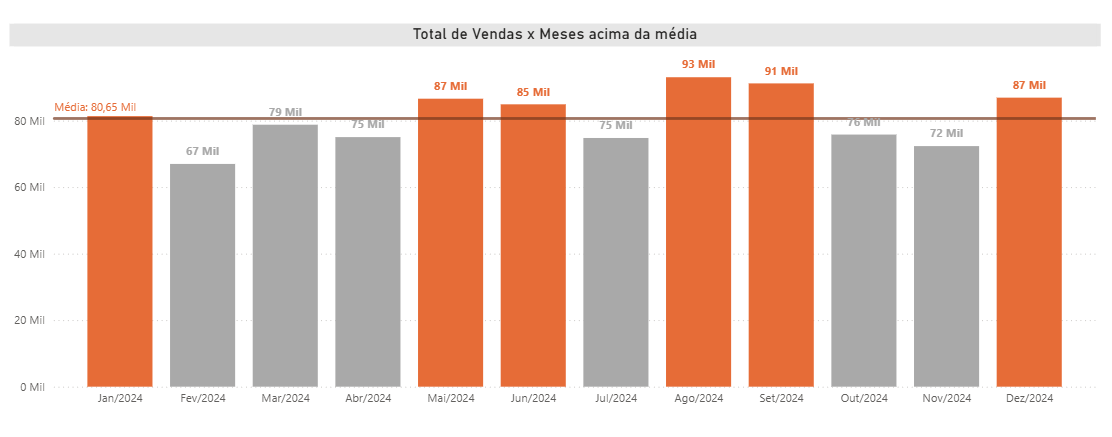